In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as mg
import seaborn as sns

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.rename(columns={'cp':"chestpain",'trestbps':'bloodpressure'},inplace = True)

In [8]:
data.rename(columns = {"chol" : "cholestrallevel" , "fbs" : "bloodsugar" , "restecg":"cardioc" , "thalach":"heartrate"},inplace = True)

In [9]:
data.head(10)

,age,sex,chestpain,bloodpressure,cholestrallevel,bloodsugar,cardioc,heartrate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


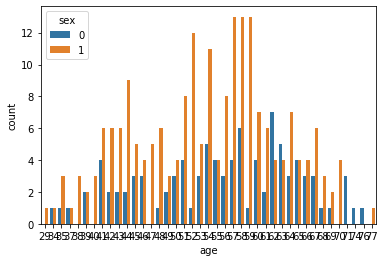

In [10]:
sns.countplot(x="age" ,hue = "sex" ,data = data )

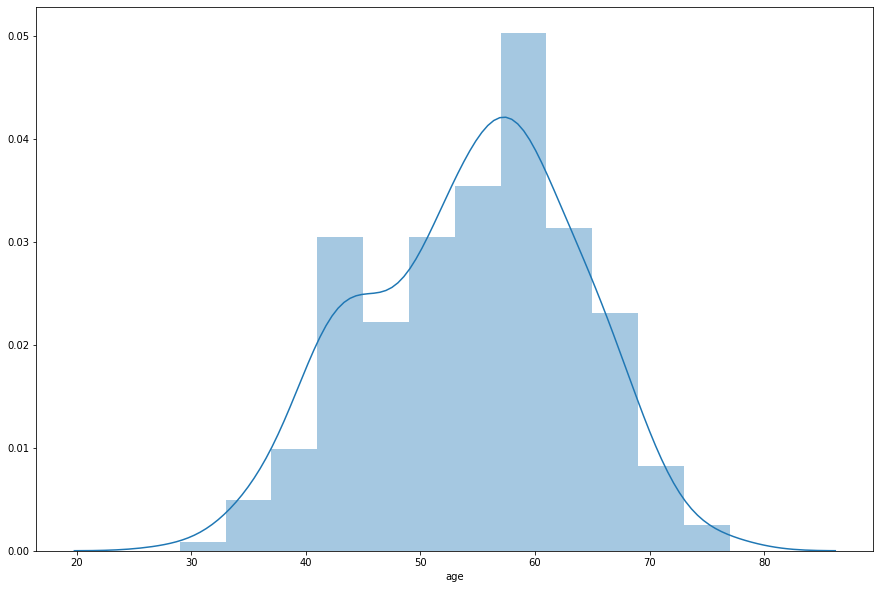

In [11]:
plt.figure(figsize=(15,10))
sns.distplot(data.age)

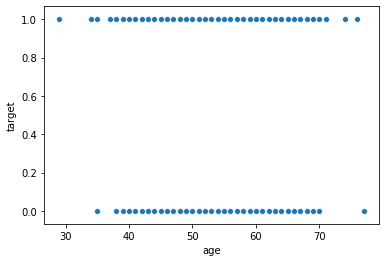

In [13]:
sns.scatterplot(x="age" , y = "target" ,data = data)

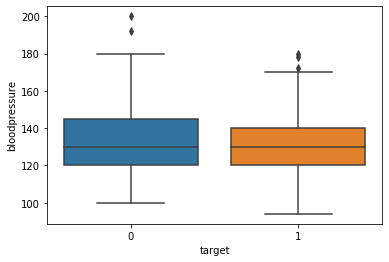

In [12]:
sns.boxplot(y="bloodpressure" , x = "target" ,data = data)

In [17]:
def plotting(variable1 ,variable):
    sns.boxplot(y = variable ,x = variable1 ,data = data)
    plt.figure(figsize = (10,15))
    plt.show()

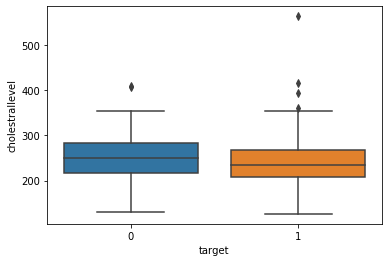

<Figure size 720x1080 with 0 Axes>

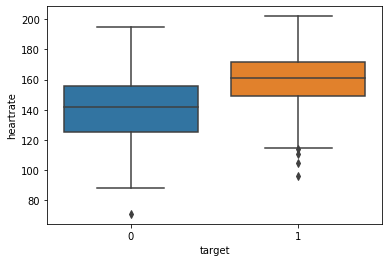

<Figure size 720x1080 with 0 Axes>

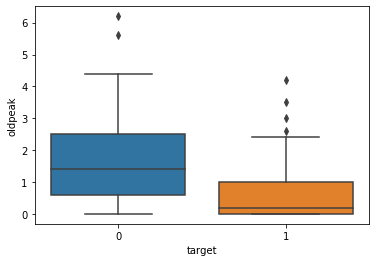

<Figure size 720x1080 with 0 Axes>

In [18]:
plotting("target" ,"cholestrallevel")
plotting("target" ,"heartrate")
plotting("target" ,"oldpeak")

In [19]:
y=data.target
x=data.drop(columns=['target'],axis=1)

In [20]:
x.head()

,age,sex,chestpain,bloodpressure,cholestrallevel,bloodsugar,cardioc,heartrate,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 0)
print(x_train.shape ,y_train.shape,x_test.shape ,y_test.shape)

(242, 13) (242,) (61, 13) (61,)


In [24]:
heart_model=LogisticRegression()
heart_model.fit(x_train,y_train)
pred=heart_model.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8524590163934426
[[22  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



C:\Users\Karthick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


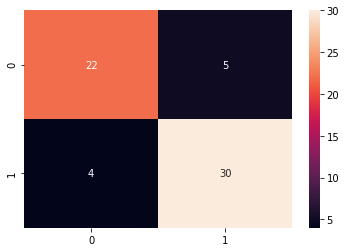

In [26]:
cn = confusion_matrix(y_test ,pred)
sns.heatmap(cn,annot =True )

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5).fit(x_train ,y_train)
cm = confusion_matrix(y_test , rf.predict(x_test))
acc = accuracy_score(y_test ,rf.predict(x_test))
print("confusio_matrix and acuuracy_score")
print(cm ,acc)

confusio_matrix and acuuracy_score
[[21  6]
 [ 3 31]] 0.8524590163934426


In [29]:
from sklearn.tree import DecisionTreeClassifier
rf = DecisionTreeClassifier(max_depth = 5).fit(x_train ,y_train)
cm = confusion_matrix(y_test , rf.predict(x_test))
acc = accuracy_score(y_test ,rf.predict(x_test))
print("confusio_matrix and acuuracy_score")
print(cm ,acc)

confusio_matrix and acuuracy_score
[[21  6]
 [ 8 26]] 0.7704918032786885


In [30]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std =StandardScaler().fit_transform(x_test)

In [31]:
heart_model=LogisticRegression()
heart_model.fit(x_train_std,y_train)
pred=heart_model.predict(x_test_std)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8524590163934426
[[21  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [37]:
x_train.slope.value_counts()

2    116
1    109
0     17
Name: slope, dtype: int64

In [33]:
x_train_std

array([[-1.32773282, -1.43641607,  0.98584243, ..., -0.66169316,
        -0.70710678, -0.46472917],
       [ 1.24903178, -1.43641607,  0.98584243, ..., -0.66169316,
         0.26516504, -0.46472917],
       [ 0.35276583,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       ...,
       [ 0.12869935,  0.69617712,  1.94013791, ..., -0.66169316,
        -0.70710678,  1.14190596],
       [-0.87959984,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       [ 0.35276583,  0.69617712,  0.03154696, ..., -0.66169316,
        -0.70710678, -0.46472917]])